<a href="https://colab.research.google.com/github/starkjiang/TrAC-GNN/blob/main/basic_gnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Packages

In [ ]:
"""Install packages that are required to execute this notebook.
"""
# Install packages. This may take some time.
!pip install torch-scatter~=2.1.0
!pip install torch-sparse~=0.6.16
!pip install torch-cluster~=1.6.0
!pip install torch-spline-conv~=1.2.1
!pip install torch-geometric==2.2.0 -f https://data.pyg.org/whl/torch-{torch.__version__}.html

import torch
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp310-cp310-linux_x86_64.whl size=3658839 sha256=7617fb62b668b61293b6306a57ca388276f9b82970a733ec7b3f9dbbca211550
  Stored in directory: /root/.cache/pip/wheels/92/f1/2b/3b46d54b134259f58c8363568569053248040859b1a145b3ce
Successfully built torch-scatter
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-sparse: filename=torch_sparse-0.6.18-cp310-cp310-linux_x86_64.whl size=2809238 sha256=292038d606900d3dff651815287d82f861828f3e60a4ee3dbcb098a98c1c81e6
  Stored in directory: /root/.cache/pip/wheels/c9/dd/0f/a6a16f9f3b0236733d257b4b4ea91b548b984a341ed3b8f38c
Successfully built torch-sparse
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done

# Helper Function for Visualization

In [ ]:
# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

# Citeseer Dataset

In [ ]:
# Use the built-in dataset from PyG.
from torch_geometric.datasets import Planetoid

# Import dataset from PyTorch Geometric
dataset = Planetoid(root=".", name="CiteSeer")

data = dataset[0]

# Print information about the dataset
print(f'Dataset: {dataset}')
print('---------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')

# Print information about the graph
print(f'\nGraph:')
print('------')
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')

Processing...


Dataset: CiteSeer()
---------------
Number of graphs: 1
Number of features: 3703
Number of classes: 6
Number of nodes: 3327
Number of edges: 9104
Average node degree: 2.74
Number of training nodes: 120
Training node label rate: 0.04

Graph:
------
Edges are directed: False
Graph has isolated nodes: True
Graph has loops: False


Done!
/usr/local/lib/python3.10/dist-packages/torch_geometric/datasets/planetoid.py:94: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.data, self.slices = torch.load(sel

# Dataframe of Citeseer

In [ ]:
# Use CiteSeer dataset from the built-in datasets.
import pandas as pd

dataset = Planetoid(root=".", name="CiteSeer")
data = dataset[0]

df_x = pd.DataFrame(data.x.numpy())
df_x['label'] = pd.DataFrame(data.y)
df_x

/usr/local/lib/python3.10/dist-packages/torch_geometric/data/dataset.py:189: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  if osp.exists(f) and torch.load(f) != _repr(self.p

,0,1,2,3,4,5,6,7,8,9,...,3694,3695,3696,3697,3698,3699,3700,3701,3702,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


# MLP as baseline

In [ ]:
# Construct an vanilla MLP for classification.
import torch
torch.manual_seed(0)
from torch.nn import Linear
import torch.nn.functional as F


def accuracy(y_pred, y_true):
    """Calculate accuracy."""
    return torch.sum(y_pred == y_true) / len(y_true)


class MLP(torch.nn.Module):
    """Multilayer Perceptron"""
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()

        # Initialize the linear layers
        self.linear1 = None
        self.linear2 = None

        self.linear1 = Linear(dim_in, dim_h)
        self.linear2 = Linear(dim_h, dim_out)


    def forward(self, x):
        # Pass the input through the two linear layers.
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        return F.log_softmax(x, dim=1)

    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(),
                                          lr=0.01,
                                          weight_decay=5e-4)

        self.train()
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1),
                          data.y[data.train_mask])
            loss.backward()
            optimizer.step()

            if(epoch % 20 == 0):
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1),
                                   data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc:'
                      f' {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | '
                      f'Val Acc: {val_acc*100:.2f}%')

    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x)
        acc = accuracy(
            out.argmax(dim=1)[data.test_mask], data.y[data.test_mask]
        )
        return acc

# Create MLP model
mlp = MLP(dataset.num_features, 16, dataset.num_classes)
print(mlp)

# Train
mlp.fit(data, epochs=200)

# Test
acc = mlp.test(data)
print(f'\nMLP test accuracy: {acc*100:.2f}%')

MLP(
  (linear1): Linear(in_features=3703, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=6, bias=True)
)
Epoch   0 | Train Loss: 1.799 | Train Acc: 16.67% | Val Loss: 1.78 | Val Acc: 18.80%
Epoch  20 | Train Loss: 0.004 | Train Acc: 100.00% | Val Loss: 1.29 | Val Acc: 53.20%
Epoch  40 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 1.29 | Val Acc: 53.20%
Epoch  60 | Train Loss: 0.002 | Train Acc: 100.00% | Val Loss: 1.27 | Val Acc: 55.20%
Epoch  80 | Train Loss: 0.005 | Train Acc: 100.00% | Val Loss: 1.25 | Val Acc: 56.60%
Epoch 100 | Train Loss: 0.006 | Train Acc: 100.00% | Val Loss: 1.22 | Val Acc: 56.80%
Epoch 120 | Train Loss: 0.005 | Train Acc: 100.00% | Val Loss: 1.21 | Val Acc: 57.20%
Epoch 140 | Train Loss: 0.005 | Train Acc: 100.00% | Val Loss: 1.21 | Val Acc: 57.80%
Epoch 160 | Train Loss: 0.005 | Train Acc: 100.00% | Val Loss: 1.21 | Val Acc: 57.20%
Epoch 180 | Train Loss: 0.004 | Train Acc: 100.00% | Val Loss: 1.21 | Val Acc: 57.60%
Epoch

# Create a vanilla GNN layer

In [ ]:
# Create a basic GNN layer.
class VanillaGNNLayer(torch.nn.Module):
    def __init__(self, dim_in, dim_out):
        super().__init__()
        self.linear = Linear(dim_in, dim_out, bias=False)

    def forward(self, x, adjacency):
        x = self.linear(x)
        # Neighborhood aggregation through matrix multiplication.
        x = torch.sparse.mm(adjacency, x)
        return x

# Preprocess the adjacency matrix

In [ ]:
# Get the input graph through adjacency.
from torch_geometric.utils import to_dense_adj

adjacency = to_dense_adj(data.edge_index)[0]
adjacency += torch.eye(len(adjacency)) # We need to include self-loops.
adjacency

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])

# Create basic GNN model

**Exercise:**

1. Define two GNN layers in the `VanillaGNN` model
2. Establish the whole basic GNN model by leveraging the GNN layers

In [ ]:
# Create basic GNN model and then train and test the data.
class VanillaGNN(torch.nn.Module):
    """Vanilla Graph Neural Network"""
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()

        # Initialize two GNN layers.
        self.gnn1 = None
        self.gnn2 = None
        self.gnn1 = VanillaGNNLayer(dim_in, dim_h)
        self.gnn2 = VanillaGNNLayer(dim_h, dim_out)


    def forward(self, x, adjacency):
        # Pass the input through the two GNN layers.
        x = self.gnn1(x, adjacency)
        x = F.relu(x)
        x = self.gnn2(x, adjacency)
        return F.log_softmax(x, dim=1)

    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(),
                                      lr=0.01,
                                      weight_decay=5e-4)

        self.train()
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x, adjacency)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1),
                          data.y[data.train_mask])
            loss.backward()
            optimizer.step()

            if(epoch % 20 == 0):
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1),
                                  data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc:'
                      f' {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | '
                      f'Val Acc: {val_acc*100:.2f}%')

    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x, adjacency)
        acc = accuracy(
            out.argmax(dim=1)[data.test_mask], data.y[data.test_mask]
        )
        return acc

# Creat Basic GNN and Visualize Node Embeddings

We compare the node embeddings from both untrained and trained models.

VanillaGNN(
  (gnn1): VanillaGNNLayer(
    (linear): Linear(in_features=3703, out_features=16, bias=False)
  )
  (gnn2): VanillaGNNLayer(
    (linear): Linear(in_features=16, out_features=6, bias=False)
  )
)


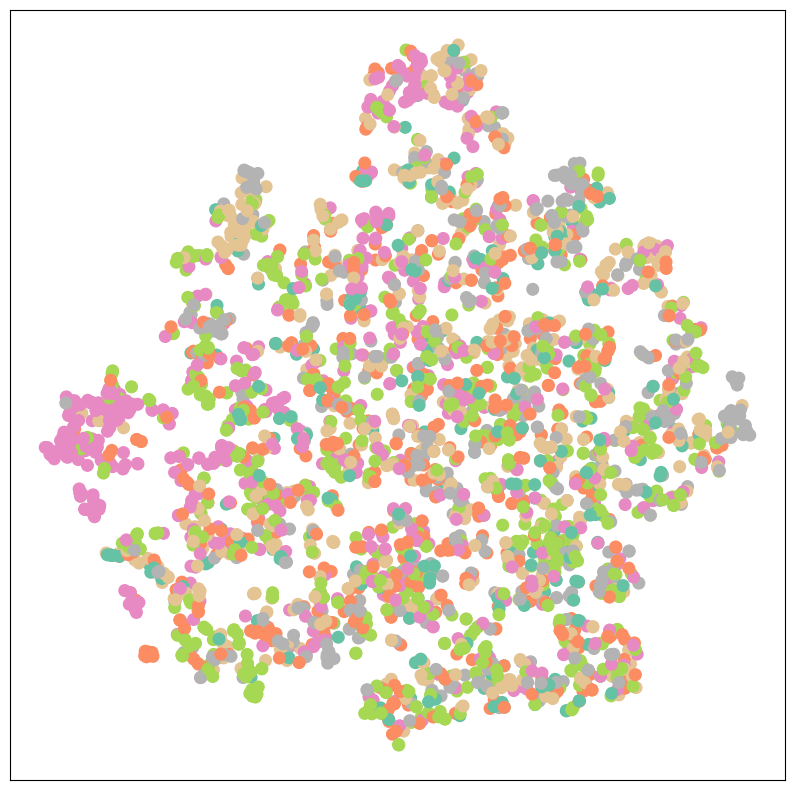

Epoch   0 | Train Loss: 1.834 | Train Acc: 12.50% | Val Loss: 1.81 | Val Acc: 21.60%
Epoch  20 | Train Loss: 0.006 | Train Acc: 100.00% | Val Loss: 2.88 | Val Acc: 60.00%
Epoch  40 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 3.42 | Val Acc: 59.20%
Epoch  60 | Train Loss: 0.000 | Train Acc: 100.00% | Val Loss: 3.27 | Val Acc: 58.40%
Epoch  80 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 3.00 | Val Acc: 59.20%
Epoch 100 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 2.80 | Val Acc: 59.40%
Epoch 120 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 2.65 | Val Acc: 59.80%
Epoch 140 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 2.51 | Val Acc: 59.40%
Epoch 160 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 2.40 | Val Acc: 60.60%
Epoch 180 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 2.31 | Val Acc: 61.60%
Epoch 200 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 2.23 | Val Acc: 61.40%

GNN test accuracy: 61.40%


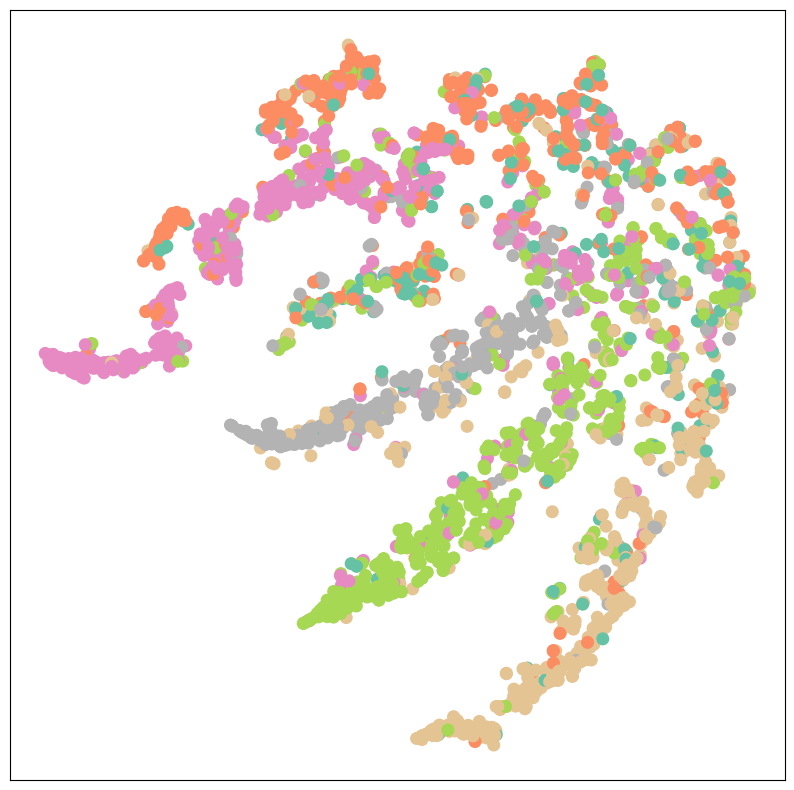

In [ ]:
# Create the Vanilla GNN model
gnn = VanillaGNN(dataset.num_features, 16, dataset.num_classes)
print(gnn)

out = gnn(data.x, adjacency)

# Visualize the node embedding of untrained GNN.
visualize(out, color=data.y)

# Train.
gnn.fit(data, epochs=200)

# Test.
acc = gnn.test(data)
print(f'\nGNN test accuracy: {acc*100:.2f}%')

# Visualize the output embeddings of the trained model.
out = gnn(data.x, adjacency)
visualize(out, color=data.y)

# Facebook Page-Page Dataset

In [ ]:
from torch_geometric.datasets import FacebookPagePage

# Import dataset from PyTorch Geometric
dataset = FacebookPagePage(root=".")

data = dataset[0]

# Print information about the dataset
print(f'Dataset: {dataset}')
print('-----------------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of nodes: {data.x.shape[0]}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

# Print information about the graph
print(f'\nGraph:')
print('------')
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')

Dataset: FacebookPagePage()
-----------------------
Number of graphs: 1
Number of nodes: 22470
Number of features: 128
Number of classes: 4

Graph:
------
Edges are directed: False
Graph has isolated nodes: False
Graph has loops: True


Processing...
Done!
/usr/local/lib/python3.10/dist-packages/torch_geometric/datasets/facebook.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.data, self.slices = t

# Use Facebook Page-Page dataset for training and testing

In [ ]:
# Use the Facebook Page-Page dataset.
dataset = FacebookPagePage(root=".")
data = dataset[0]
data.train_mask = range(18000)
data.val_mask = range(18001, 20000)
data.test_mask = range(20001, 22470)

# Adjacency matrix
adjacency = to_dense_adj(data.edge_index)[0]
adjacency += torch.eye(len(adjacency))
adjacency

# Use MLP for classification.
mlp = MLP(dataset.num_features, 16, dataset.num_classes)
print(mlp)
mlp.fit(data, epochs=100)
acc = mlp.test(data)
print(f'\nMLP test accuracy: {acc*100:.2f}%\n')

# Use GNN for classification.
gnn = VanillaGNN(dataset.num_features, 16, dataset.num_classes)
print(gnn)
gnn.fit(data, epochs=100)
acc = gnn.test(data)
print(f'\nGNN test accuracy: {acc*100:.2f}%')

/usr/local/lib/python3.10/dist-packages/torch_geometric/data/dataset.py:189: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  if osp.exists(f) and torch.load(f) != _repr(self.p

MLP(
  (linear1): Linear(in_features=128, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=4, bias=True)
)
Epoch   0 | Train Loss: 1.425 | Train Acc: 25.94% | Val Loss: 1.42 | Val Acc: 27.11%
Epoch  20 | Train Loss: 0.667 | Train Acc: 73.36% | Val Loss: 0.69 | Val Acc: 72.04%
Epoch  40 | Train Loss: 0.577 | Train Acc: 76.96% | Val Loss: 0.63 | Val Acc: 75.14%
Epoch  60 | Train Loss: 0.547 | Train Acc: 77.96% | Val Loss: 0.61 | Val Acc: 74.99%
Epoch  80 | Train Loss: 0.531 | Train Acc: 78.57% | Val Loss: 0.61 | Val Acc: 75.04%
Epoch 100 | Train Loss: 0.518 | Train Acc: 79.26% | Val Loss: 0.61 | Val Acc: 75.24%

MLP test accuracy: 75.62%

VanillaGNN(
  (gnn1): VanillaGNNLayer(
    (linear): Linear(in_features=128, out_features=16, bias=False)
  )
  (gnn2): VanillaGNNLayer(
    (linear): Linear(in_features=16, out_features=4, bias=False)
  )
)
Epoch   0 | Train Loss: 149.803 | Train Acc: 26.21% | Val Loss: 153.78 | Val Acc: 25.91%
Epoch  20 | Train Loss: 3.354 